In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# load the data
df = pd.read_csv('C:/Data/SupervisedLearningWShop/synth_temp.csv')
# slice 1902 and forward
df = df.loc[df.Year > 1901]
# roll up by year
df_group_year = df.groupby(['Year']).agg({'RgnAvTemp' : 'mean'})

In [2]:
# add the Year column so we can use that in a model
df_group_year['Year'] = df_group_year.index
df_group_year = df_group_year.rename(columns = {'RgnAvTemp' : 'AvTemp'})
# add a Year**2 column to build a polynomial model of degree 2
df_group_year['Year2'] = df_group_year['Year']**2
print(df_group_year.head())
print(df_group_year.tail())

         AvTemp  Year    Year2
Year                          
1902  17.385044  1902  3617604
1903  17.222163  1903  3621409
1904  17.217215  1904  3625216
1905  17.817502  1905  3629025
1906  17.386445  1906  3632836
         AvTemp  Year    Year2
Year                          
2006  19.904999  2006  4024036
2007  19.820224  2007  4028049
2008  19.245558  2008  4032064
2009  19.537290  2009  4036081
2010  19.919115  2010  4040100


In [3]:
# construct the model and inspect results
linear_model = LinearRegression(fit_intercept = True)
linear_model.fit(df_group_year.loc[:, ['Year', 'Year2']],
                 df_group_year.AvTemp)
print('model coefficients = ', linear_model.coef_)
print('model intercept = ', linear_model.intercept_)
r2 = linear_model.score(df_group_year.loc[:, ['Year', 'Year2']],
                        df_group_year.AvTemp)
print('r squared = ', r2)

model coefficients =  [-1.02981369e+00  2.69257683e-04]
model intercept =  1002.0087338444181
r squared =  0.9313996496373737


In [5]:
# generate predictions for visualization
pred_X = df_group_year.loc[:, ['Year', 'Year2']]
pred_Y = linear_model.predict(pred_X)
# generate predictions for the next 10 years
pred_X_future = pd.DataFrame(
    list(range(2011, 2021))).rename(columns = {0 : 'Year'})
pred_X_future['Year2'] = pred_X_future['Year']**2
pred_Y_future = linear_model.predict(pred_X_future)

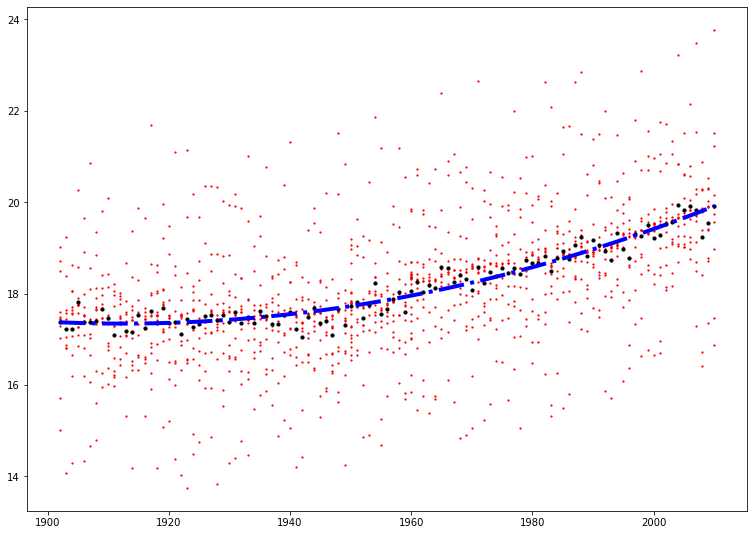

In [6]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
# Raw data
raw_plot_data = df
ax.scatter(raw_plot_data.Year, 
           raw_plot_data.RgnAvTemp, 
           label = 'Raw Data', 
           c = 'red',
           s = 1.5)
# Annual averages
ax.scatter(df_group_year.Year, 
           df_group_year.AvTemp, 
           label = 'Annual average', 
           c = 'k',
           s = 10)
# linear fit
ax.plot(pred_X.Year, pred_Y, 
        c = "blue",
        linestyle = '-.',
        linewidth = 4,
        label = 'linear fit')

In [7]:
ax.plot(pred_X_future.Year, pred_Y_future,
        c = "purple",
        linestyle = '--',
        linewidth = 4,
        label = 'future predictions')
ax.set_title('Mean Air Temperature Measurements',
             fontsize = 16)
# make the ticks include the first and last years
tick_years = [1902] + list(range(1910, 2021, 10))
ax.set_xlabel('Year', 
             fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
              fontsize = 14)
ax.set_ylim(15, 21)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()